# Report of the problem "tactile"(Hongkun Li and Boyun Chen)

# Analyse and solution of the problem
As the document said, we used the method of mirror to simulate the different orders of the reflected signals.We have searched on the internet and found that there is a quite interesting rule for the positions of different orders of mirror sources.As shown in the picture below:  

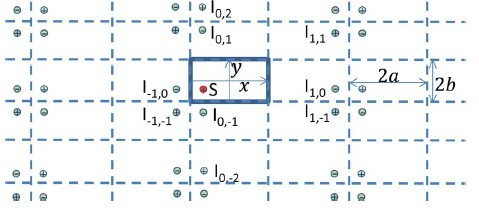
                                   
                                                     The figure comes from the reference[1].

We can see that they are periodic.So we can get the equations of their positions:
$$\textbf{x}_m = \textbf{2ma} + \textbf{(-1)}^m\textbf{x}_0$$
$$\textbf{y}_n = \textbf{2nb} + \textbf{(-1)}^n\textbf{y}_0$$
m,n are the orders of x direction and y direction,|m| and |n| are the times of reflections in the x direction and y direction, so the total order = |m| + |n|, representing the total reflections. The signal received of some order (order = |m| + |n|,c is the velocity of the signal) is:
$$\textbf{S}_{re}(t) = \textbf{S}_{source}(t-\frac{r_{m,n}}{c})\frac{\textbf{e}^{-jkr_{m,n}}}{r_{m,n}}r^{|m|}_{x}r^{|n|}_y  (r_{m,n} = \sqrt{x_m^2 + y_n^2})$$

So we can see that the problem is quite simple: give us a total order, we just find all the possible m and n, and we calculate the $\textbf{S}_{re}(t)$ through the above equations. In this way, we can get the received signal of some order.How do we find all possible m and n? Give us an order, and we iterate |m| through 0 to order(code of the loop: for |m| in range(order+1)),|n| = order-|m|, if |m|= 0 or |n| = 0, we add the signals of the orders $(x_{|m|}, y_{|n|})$ and $(x_{-|m|}, y_{-|n|})$, for the other cases, we add the signals of the orders $(x_{|m|}, y_{|n|})$,$(x_{-|m|}, y_{|n|})$,$(x_{|m|}, y_{-|n|})$ and $(x_{-|m|}, y_{-|n|})$. So in this way, we can cover all possibilities.

# Coefficient of correlation
To calculate the coefficient below:
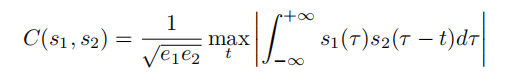
We have used the Fourier transform in python (numpy.fft.fft()), the pseudocode is:$$C(s_1, s_2) = \frac{1}{\sqrt{e_{1}e_{2}}}max(|inverseTF(TF(s_1)×conjugate(TF(s_2)))|)$$

# Coefficient of phase correlation
We searched on the internet, and we found the equation of the coefficient of phase correlation is:
$$PC(s_1, s_2) = max(|F^{-1}(\frac{F(s_1)·{F(s_2)}^*}{|F(s_1)·{F(s_2)}^*|})|)$$
We have used the Fourier transform in python (numpy.fft.fft()), the pseudocode is:$$PC(s_1, s_2) = max(|inverseTF(\frac{TF(s_1)×conjugate(TF(s_2))}{|TF(s_1)×conjugate(TF(s_2))|})|)$$


# Results


This is our diagram of the whole structure:
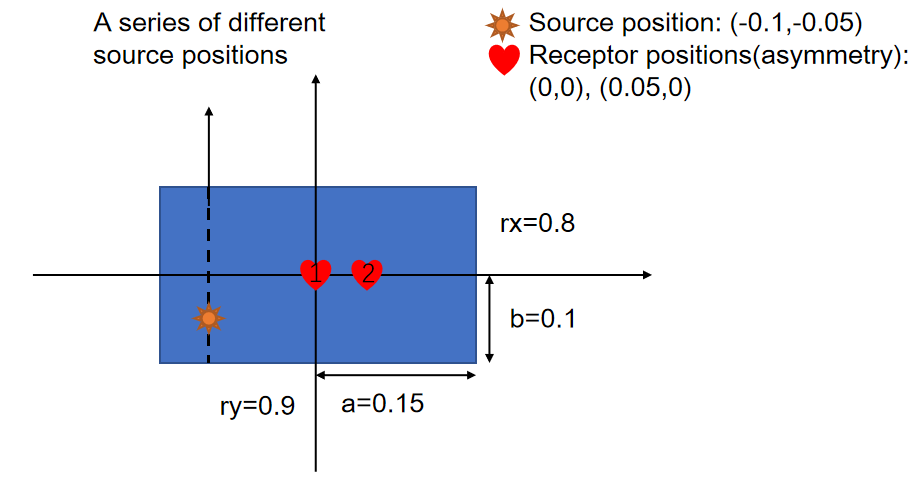

We use the impulsion of the sinusoid modulated by a Gaussian in the class:
$$s(t) = sin(2πf_{c}t)e^{-αt^2}, α = \frac{π}{ln2}(\frac{b_{w}f_c}{2})^2 $$
$b_w$ is the relative bandwidth and it's 100%, fc is the central frequence and it's 1MHz.
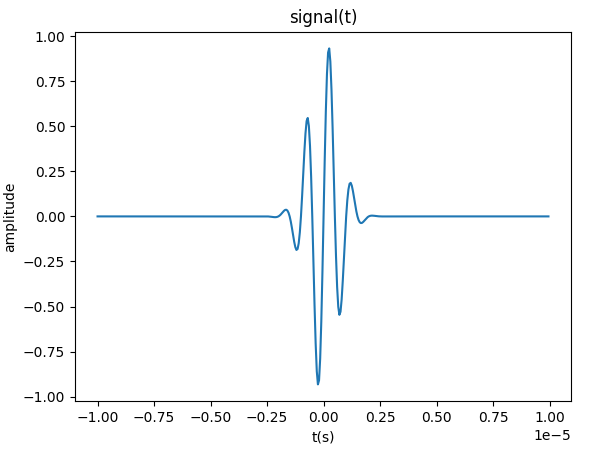

The 0,1,2 order of receptor1:
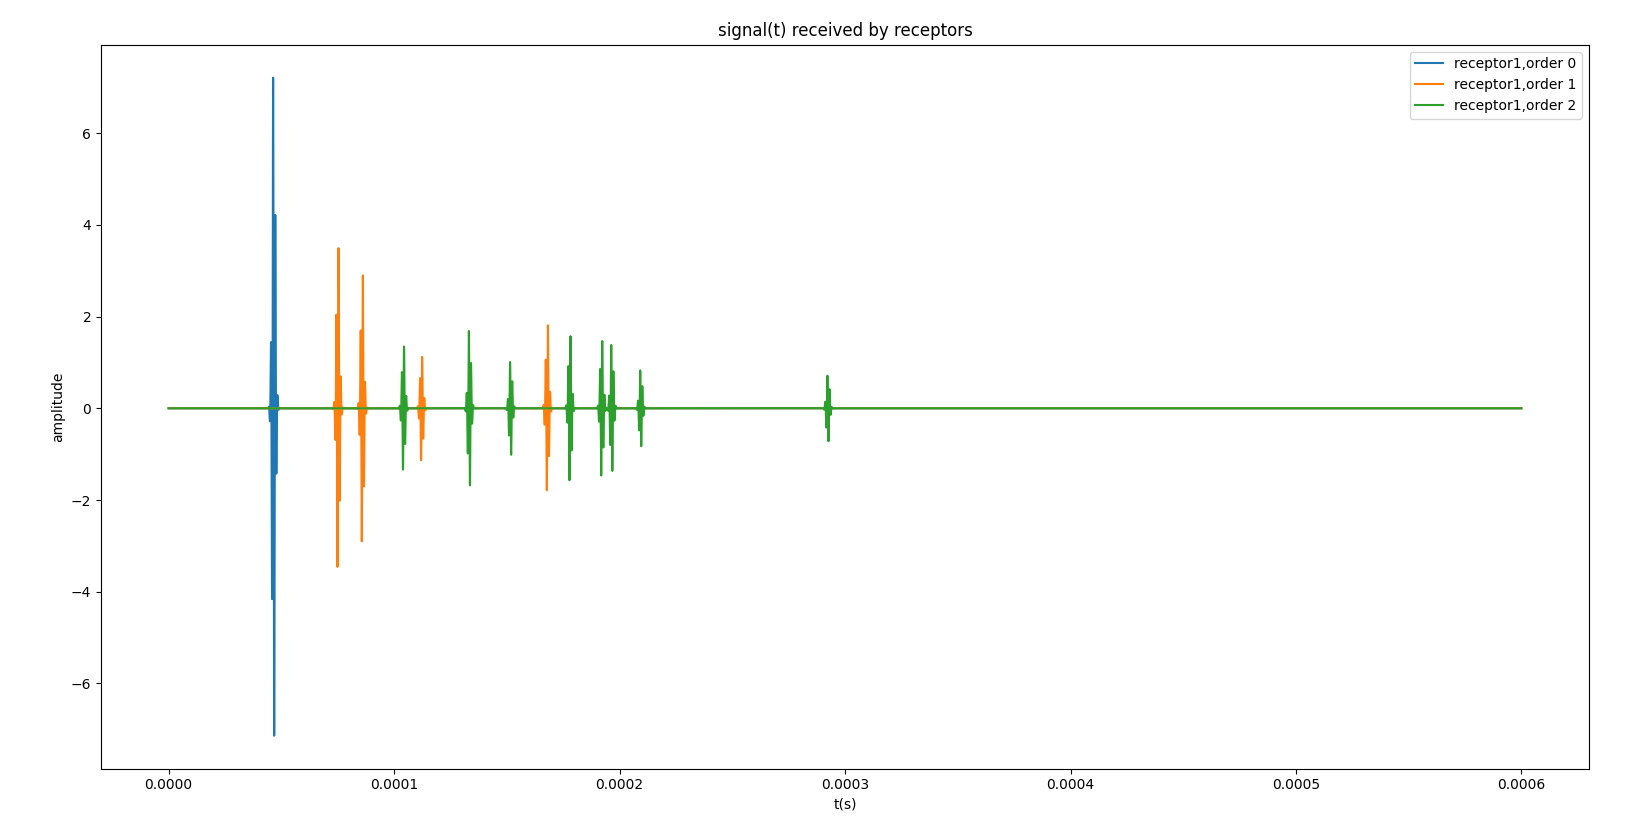

Mean coefficient of correlation for the series of different source positions of different central frequences:
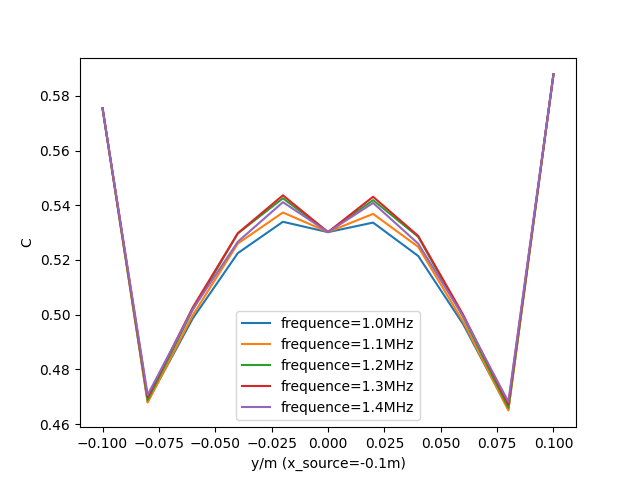
Mean phase coefficient of correlation for the series of different source positions of different central frequences:
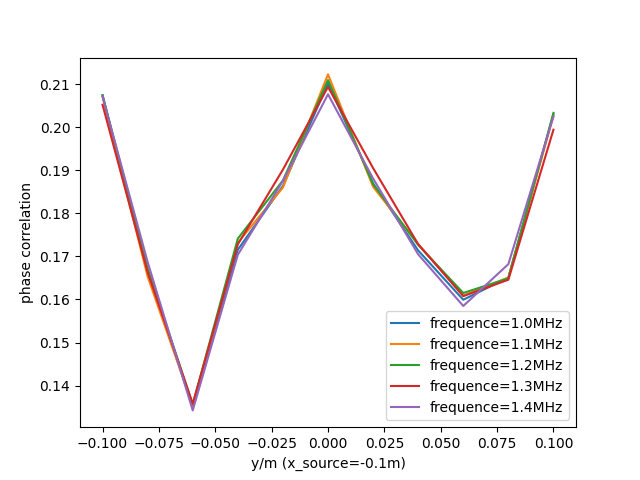

We can see that for different central frequences the two coefficients are slightly different.

# Reference
[1] C. Zhou and J. Waynert, "The Equivalence of the Ray Tracing and Modal Methods for Modeling Radio Propagation in Lossy Rectangular Tunnels," in IEEE Antennas and Wireless Propagation Letters, vol. 13, pp. 615-618, 2014.